#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("imdb_top_10000.txt",sep='\t')

In [2]:
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [3]:
df = pd.read_csv("imdb_top_10000.txt",sep='\t',names=['imdbID','title','year','score','votes','runtime','genre'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                              genre  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [4]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genre       object
dtype: object

In [5]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genre      1
dtype: int64

In [6]:
df[df.genre.isna() == True]

imdbID             title  year  score  votes   runtime genre
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.   NaN

In [7]:
df.dropna(subset=["genre"],inplace=True)
df.shape


(9999, 7)

In [8]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genre      0
dtype: int64

## 2. Asking Questions

In [9]:
#Determine the best movie based on vote.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [10]:
rt = df.runtime[0]
rt


'142 mins.'

In [11]:
runtimedf = rt.split("mins.")[0]
runtimedf

runtime =[int]

In [12]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                              genre  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [13]:
df["runtime"] = df["runtime"].astype('int')
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int32
genre       object
dtype: object

In [14]:
genre_set = set()
for genre in df.genre:
    genre_set.update(genre.split("|"))

In [15]:
len(genre_set)

24

In [16]:
for genre in genre_set:
    df[genre]=[genre in row.split('|') for row in df.genre]
    

In [17]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                              genre  Romance  Drama  Sport  ...  Biography  \
0                       Crime|Drama    False   True  False  ...      False   
1                    Crime|Thriller    False  False  False  ...      False   
2            Drama|Mystery|Thriller    False   True  False  ...      False   
3           Action|Adventure|Sci-Fi    False  False  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller    False  False  False  ...      False   

   Musical  Sci-Fi  Comedy  Western  Animation  Fantasy  Adult   News    War  
0    False   False   False    False      False    False  False  False  False  
1    False   False   False    False      False    False  False  False  False  
2    False   False   False    False      False    False  False  False  False  
3    False    True   False    False      False    False  False  False  False  
4    False    True   False    False      False    False  False  False  False  

[5 rows x 31 columns]

In [18]:
titles = [title[:7] for title in df.title]
df['title'] = titles
df.head()

imdbID    title  year  score   votes  runtime  \
0  tt0111161  The Sha  1994    9.2  619479      142   
1  tt0110912  Pulp Fi  1994    9.0  490065      154   
2  tt0137523  Fight C  1999    8.8  458173      139   
3  tt0133093  The Mat  1999    8.7  448114      136   
4  tt1375666  Incepti  2010    8.9  385149      148   

                              genre  Romance  Drama  Sport  ...  Biography  \
0                       Crime|Drama    False   True  False  ...      False   
1                    Crime|Thriller    False  False  False  ...      False   
2            Drama|Mystery|Thriller    False   True  False  ...      False   
3           Action|Adventure|Sci-Fi    False  False  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller    False  False  False  ...      False   

   Musical  Sci-Fi  Comedy  Western  Animation  Fantasy  Adult   News    War  
0    False   False   False    False      False    False  False  False  False  
1    False   False   False    False      False    False  False  False  False  
2    False   False   False    False      False    False  False  False  False  
3    False    True   False    False      False    False  False  False  False  
4    False    True   False    False      False    False  False  False  False  

[5 rows x 31 columns]

## 4. EDA

In [28]:
small_df = df[['title', 'runtime']]
run_time = small_df['runtime']
print("Longest runtime")
print(run_time.max())
print("Shortest runtime")
print(run_time.min())

Longest runtime
450
Shortest runtime
0


In [29]:
small_df = df[['title', 'runtime']]
result = small_df[(small_df['runtime'] >= 100)]
result.head()

title  runtime
0  The Sha      142
1  Pulp Fi      154
2  Fight C      139
3  The Mat      136
4  Incepti      148

## 5. Determining Best Movies

In [26]:
df[df.score == df.score.max()][['title', 'year', 'score', 'votes', 'genre', 'runtime']]

title  year  score   votes        genre  runtime
0   The Sha  1994    9.2  619479  Crime|Drama      142
26  The God  1972    9.2  474189  Crime|Drama      175

## 6. Trends in Popularity of Genres

In [21]:
genredf = df[list(genre_set)]
genredf.head()

Romance  Drama  Sport  Thriller  Reality-TV  Family  Action  Adventure  \
0    False   True  False     False       False   False   False      False   
1    False  False  False      True       False   False   False      False   
2    False   True  False      True       False   False   False      False   
3    False  False  False     False       False   False    True       True   
4    False  False  False      True       False   False    True       True   

   Music  Film-Noir  ...  Biography  Musical  Sci-Fi  Comedy  Western  \
0  False      False  ...      False    False   False   False    False   
1  False      False  ...      False    False   False   False    False   
2  False      False  ...      False    False   False   False    False   
3  False      False  ...      False    False    True   False    False   
4  False      False  ...      False    False    True   False    False   

   Animation  Fantasy  Adult   News    War  
0      False    False  False  False  False  
1      False    False  False  False  False  
2      False    False  False  False  False  
3      False    False  False  False  False  
4      False    False  False  False  False  

[5 rows x 24 columns]

In [22]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

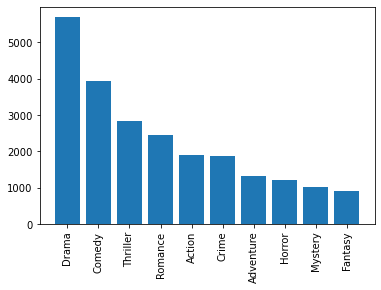

In [23]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()